In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [4]:
data=pd.read_csv('C:/Users/Asus/Downloads/Datafiniti_Amazon_Consumer_Reviews_of_Amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [7]:
data = data[['reviews.rating' , 'reviews.text']]
data=data.dropna()
data.head()

,reviews.rating,reviews.text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [8]:
df=data.copy()

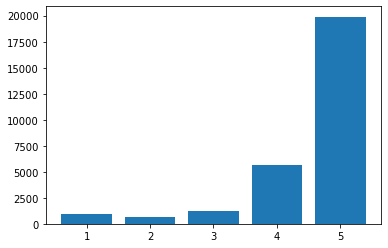

In [9]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [10]:
sentiment = {1: 0,2: 0,3: 0,4: 1,5: 1}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

In [11]:
df

,reviews.rating,reviews.text,sentiment
0,3,I order 3 of them and one of the item is bad q...,0
1,4,Bulk is always the less expensive way to go fo...,1
2,5,Well they are not Duracell but for the price i...,1
3,5,Seem to work as well as name brand batteries a...,1
4,5,These batteries are very long lasting the pric...,1
...,...,...,...
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,1
28328,4,I bought this for my niece for a Christmas gif...,1
28329,5,"Very nice for light internet browsing, keeping...",1
28330,5,This Tablet does absolutely everything I want!...,1


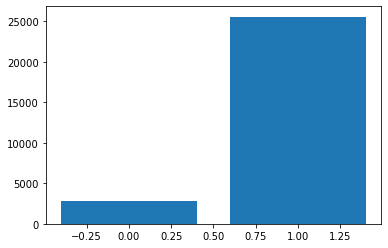

In [12]:
counts = df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [13]:

#cleaning the reviews and 
df["reviews.text"]=df["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
df["reviews.text"]=df["reviews.text"].str.lower()





In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
stopword_list = stopwords.words('english')
negation=['no','not','none','nobody','nothing']
nltk.download('wordnet')


nstopword_list = list(set(stopword_list)^set(negation))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:

ps = PorterStemmer()

def clean_text(sentence):
    rw=[word for word in sentence.split(' ') if not word in nstopword_list]
    #rw2=[ps.stem(word) for word in rw]
    result= ' '.join(rw)
    return result
    
    sentence =result
    
    words = nltk.word_tokenize(sentence)
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word # when antonym is not found, it will
                                        # remain not_happy
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    sentence = ' '.join(new_words)
    return sentence


clean_text('it is really not happy')

In [17]:
df["reviews.text"]=df["reviews.text"].apply(lambda row: clean_text(str(row)))

<AxesSubplot:>

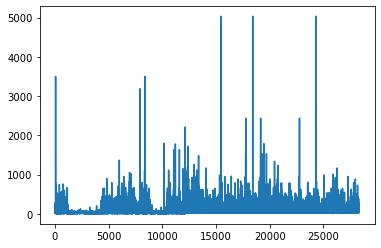

In [18]:
df["reviews.text"].str.len().plot()

In [19]:
from collections import Counter
results = Counter()
df['reviews.text'].str.split().apply(results.update)
print(results)

Counter({'great': 9464, 'batteries': 8148, 'tablet': 6686, 'good': 5906, 'price': 5221, 'use': 4484, 'not': 4374, 'amazon': 3918, 'love': 3551, 'bought': 3186, 'easy': 2954, 'kindle': 2891, 'one': 2823, 'long': 2514, 'kids': 2510, 'like': 2503, 'well': 2464, 'work': 2370, 'last': 2335, 'buy': 2276, 'fire': 2217, 'loves': 2211, 'old': 2136, 'battery': 2132, 'time': 2099, 'would': 2088, 'product': 2081, 'get': 1830, 'year': 1803, 'apps': 1789, 'no': 1710, 'games': 1710, 'much': 1635, 'screen': 1545, 'works': 1517, 'better': 1442, 'books': 1440, 'really': 1421, 'quality': 1384, 'best': 1383, 'purchased': 1361, 'brand': 1341, 'also': 1289, 'got': 1257, 'far': 1248, 'nice': 1213, 'name': 1188, 'play': 1173, 'reading': 1173, 'read': 1172, 'used': 1154, 'perfect': 1133, 'value': 1130, 'recommend': 1110, 'gift': 1061, 'device': 1033, 'store': 1009, 'life': 1004, 'son': 983, 'little': 981, 'size': 976, 'new': 974, 'daughter': 956, 'purchase': 952, 'lot': 949, 'need': 936, 'brands': 913, 'using'

In [20]:
len(results)

9809

In [21]:
(df['reviews.text'].str.count(' ') + 1).describe()

count    28332.000000
mean        17.140583
std         24.035439
min          1.000000
25%          7.000000
50%         11.000000
75%         20.000000
max        913.000000
Name: reviews.text, dtype: float64

In [22]:
df

,reviews.rating,reviews.text,sentiment
0,3,order one item bad quality missing backup s...,0
1,4,bulk always less expensive way go products like,1
2,5,well not duracell price happy,1
3,5,seem work well name brand batteries much bette...,1
4,5,batteries long lasting price great,1
...,...,...,...
28327,5,got yr old twins yr old one one better...,1
28328,4,bought niece christmas gift years old love,1
28329,5,nice light internet browsing keeping top emai...,1
28330,5,tablet absolutely everything want watch tv sh...,1


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['reviews.text'])

TfidfVectorizer()

In [20]:
df

,reviews.rating,reviews.text,sentiment
0,3,order one item bad quality missing backup spri...,0
1,4,bulk always less expensive way go products like,1
2,5,well not_duracell price happy,1
3,5,seem work well name brand batteries much bette...,1
4,5,batteries long lasting price great,1
...,...,...,...
28327,5,got yr old twins yr old one one better perfect...,1
28328,4,bought niece christmas gift years old love,1
28329,5,nice light internet browsing keeping top email...,1
28330,5,tablet absolutely everything want watch tv sho...,1


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

max_fatures = 10000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['reviews.text'].values)
X1 = tokenizer.texts_to_sequences(df['reviews.text'].values)
X1 = pad_sequences(X1,maxlen=30)

#Y1 = pd.get_dummies(df['sentiment']).values


Y1=df['sentiment'].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

embed_dim = 30
lstm_out = 50

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(LSTM(lstm_out,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\Asus\Anaconda3\lib\site-packages\keras_preprocessing\text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(21249, 30) (21249,)
(7083, 30) (7083,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 30)            300000    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 316,251
Trainable params: 316,251
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
batch_size = 32



model.fit(X1_train, Y1_train, epochs = 10, batch_size=batch_size,validation_split=0.3,verbose=1)


Epoch 1/10
465/465 [==============================] - 9s 14ms/step - loss: 0.3499 - accuracy: 0.8866 - val_loss: 0.1812 - val_accuracy: 0.9319
Epoch 2/10
465/465 [==============================] - 10s 21ms/step - loss: 0.1584 - accuracy: 0.9451 - val_loss: 0.1631 - val_accuracy: 0.9431
Epoch 3/10
465/465 [==============================] - 10s 21ms/step - loss: 0.1172 - accuracy: 0.9613 - val_loss: 0.1704 - val_accuracy: 0.9446
Epoch 4/10
465/465 [==============================] - 9s 20ms/step - loss: 0.0955 - accuracy: 0.9697 - val_loss: 0.1719 - val_accuracy: 0.9360
Epoch 5/10
465/465 [==============================] - 10s 20ms/step - loss: 0.0800 - accuracy: 0.9751 - val_loss: 0.1915 - val_accuracy: 0.9321
Epoch 6/10
465/465 [==============================] - 9s 20ms/step - loss: 0.0711 - accuracy: 0.9791 - val_loss: 0.2017 - val_accuracy: 0.9379
Epoch 7/10
465/465 [==============================] - 10s 21ms/step - loss: 0.0584 - accuracy: 0.9829 - val_loss: 0.2117 - val_accuracy: 0.

In [25]:
y_pred=model.predict(X1_test)

In [26]:
y_pred

array([[0.9993241 ],
       [0.00528648],
       [0.98856676],
       ...,
       [0.87009823],
       [0.9997022 ],
       [0.9996918 ]], dtype=float32)

In [27]:
y_pred2 = (y_pred > 0.5)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Y1_test,y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       699
           1       0.96      0.96      0.96      6384

    accuracy                           0.93      7083
   macro avg       0.81      0.82      0.81      7083
weighted avg       0.93      0.93      0.93      7083



In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,SimpleRNN
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

max_fatures = 10000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['reviews.text'].values)
X1 = tokenizer.texts_to_sequences(df['reviews.text'].values)
X1 = pad_sequences(X1,maxlen=36)

#Y1 = pd.get_dummies(df['sentiment']).values


Y1=df['sentiment'].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

embed_dim = 36
lstm_out = 50

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(SimpleRNN(lstm_out,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

(21249, 36) (21249,)
(7083, 36) (7083,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 36, 36)            360000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50)                4350      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 364,401
Trainable params: 364,401
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
batch_size = 32



model.fit(X1_train, Y1_train, epochs = 10, batch_size=batch_size,validation_split=0.3,verbose=1)


Epoch 1/10
465/465 [==============================] - 6s 10ms/step - loss: 0.3399 - accuracy: 0.8872 - val_loss: 0.2465 - val_accuracy: 0.9137
Epoch 2/10
465/465 [==============================] - 7s 15ms/step - loss: 0.1753 - accuracy: 0.9385 - val_loss: 0.1835 - val_accuracy: 0.9346
Epoch 3/10
465/465 [==============================] - 8s 16ms/step - loss: 0.0884 - accuracy: 0.9714 - val_loss: 0.1797 - val_accuracy: 0.9420
Epoch 4/10
465/465 [==============================] - 7s 16ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.1926 - val_accuracy: 0.9471
Epoch 5/10
465/465 [==============================] - 7s 15ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.2002 - val_accuracy: 0.9429
Epoch 6/10
465/465 [==============================] - 8s 17ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.2300 - val_accuracy: 0.9322
Epoch 7/10
465/465 [==============================] - 8s 16ms/step - loss: 0.0213 - accuracy: 0.9942 - val_loss: 0.2417 - val_accuracy: 0.9412

In [53]:
y_pred=model.predict(X1_test)

In [54]:
y_pred2 = (y_pred > 0.5)

In [55]:
print(classification_report(Y1_test,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       699
           1       0.96      0.97      0.96      6384

    accuracy                           0.93      7083
   macro avg       0.81      0.80      0.81      7083
weighted avg       0.93      0.93      0.93      7083

